## DSSD [Diverse Subgroup Set Discovery](https://www.researchgate.net/publication/257553441_Diverse_subgroup_set_discovery)
DSSD refers to a data mining technique which aims to extract non redundant high quality sugroups from a database.   
**non redundant with respect to subgroup's cover/content and or description/pattern over a set of descriptive attributes.*    
*\*high quality part with respect to target attribute(s).*

*\*\*The actual extraction process is achieved using selection strategies designed to achieve non-redundancy*     

| Selection strategy | Base for diversity | Notes |
| --- | --- | --- |
| Desc, VarDesc | Subgroup description | Potentially very fast, good for low number attributes (especially numeric) | 
| Cover, VarCover | Subgroup cover | Potentially a bit slower but improved diversity
| Compress, VarCompress | description and cover | Not supported yet


Typically dssd experiments handle binary, numeric and nominal attribute types as both target and descriptive attributes. Our implementation adds support for time series as target attribute but we will showcase this later in this guide.

As stated before, subgroups' quality is with respect to target attribute(s). Therefore, depending on their types, appropriate quality measures should be used.
The following table maps target attribute types to the corresponding implemented quality measure.

| Target attribute(s) type | Quality measure(s) | Recommendation |
| --- | --- | --- |
| Single binary | `WRACC`, `WKL`, `KL` | `WRACC` |
| Single Nominal | `WKL`, `KL` | `WKL` |
| Multiple binary/nominal | `WKL`, `KL` | `WKL` |
| Single Time series | `EuclideanEub`, `DtwDba`, `FastDtwDba` | --- |
| Single or multiple numeric | Not supported yet | --- |
| Multiple Time series | Not Supported yet | --- |

Similary only `binary`, `numeric` and `nominal` descriptive attributes are supported for now. Our implementation relies on pandas data structures, so the following table shows rules used to map pandas columns to a specific attribute type.      

| pandas api call | Descriptive attribute(s) type |
| --- | --- |
| pandas.api.is_bool_dtype | binary  |
| pandas.api.is_numeric_dtype | numeric |
| other | Nominal |


<small><i>This implementation is based on the research paper [Diverse subgroup set discovery](https://www.researchgate.net/publication/257553441_Diverse_subgroup_set_discovery)</i></small>

In this guide, we will perform two experiments showcasing interaction with this implementation:
1. **The Emotions dataset**
1. **And a fictional dataset demonstrating the added support for time series target attribute**


##### **EMOTIONS experiment**
First we need to download this [compressed file](http://sourceforge.net/projects/mulan/files/datasets/emotions.rar) and then manually extract the file **emotions.arff** from it. Update the arff file location in the next code block to proceed.

This dataset has **72 descriptive numeric attributes** and **6 target binary attributes**.     
While loading the dataset we specify `return_D_y = True` in order to split the dataset with respect to descriptive and target attributes as this is the format expected by the implementation.

In [1]:
from skmine.datasets.dssd import load_emotions

emotions_arff_file_path = "/udd/massigbi/scikit_mine_data/emotions.arff"
D, y = load_emotions(emotions_arff_file_path, return_D_y=True)

In [2]:
# D is a 'projection' of the dataset on the descriptive attributes
D.head()

,Mean_Acc1298_Mean_Mem40_Centroid,Mean_Acc1298_Mean_Mem40_Rolloff,Mean_Acc1298_Mean_Mem40_Flux,Mean_Acc1298_Mean_Mem40_MFCC_0,Mean_Acc1298_Mean_Mem40_MFCC_1,Mean_Acc1298_Mean_Mem40_MFCC_2,Mean_Acc1298_Mean_Mem40_MFCC_3,Mean_Acc1298_Mean_Mem40_MFCC_4,Mean_Acc1298_Mean_Mem40_MFCC_5,Mean_Acc1298_Mean_Mem40_MFCC_6,...,Std_Acc1298_Std_Mem40_MFCC_11,Std_Acc1298_Std_Mem40_MFCC_12,BH_LowPeakAmp,BH_LowPeakBPM,BH_HighPeakAmp,BH_HighPeakBPM,BH_HighLowRatio,BHSUM1,BHSUM2,BHSUM3
0,0.034741,0.089665,0.091225,-73.302422,6.215179,0.615074,2.037160,0.804065,1.301409,0.558576,...,0.118630,0.094923,0.051035,68.0,0.014937,136.0,2.0,0.245457,0.105065,0.405399
1,0.081374,0.272747,0.085733,-62.584437,3.183163,-0.218145,0.163038,0.620251,0.458514,0.041426,...,0.070075,0.041565,0.295031,70.0,0.276366,140.0,2.0,0.343547,0.276366,0.710924
2,0.110545,0.273567,0.084410,-65.235325,2.794964,0.639047,1.281297,0.757896,0.489412,0.627636,...,0.079917,0.085821,0.161574,61.0,0.000000,183.0,3.0,0.188693,0.045941,0.457372
3,0.042481,0.199281,0.093447,-80.305152,5.824409,0.648848,1.754870,1.495532,0.739909,0.809644,...,0.129145,0.122330,0.043012,66.0,0.206562,132.0,2.0,0.102839,0.241934,0.351009
4,0.074550,0.140880,0.079789,-93.697749,5.543229,1.064262,0.899152,0.890336,0.702328,0.490685,...,0.284196,0.189988,0.029308,100.0,0.144039,200.0,2.0,0.195196,0.310801,0.683817


In [3]:
# y is a 'projection' of the dataseet on the target attributes
y.head()

,amazed-suprised,happy-pleased,relaxing-calm,quiet-still,sad-lonely,angry-aggresive
0,False,True,True,False,False,False
1,True,False,False,False,False,True
2,False,True,False,False,False,True
3,False,False,True,False,False,False
4,False,False,False,True,False,False


For the actual experiment, we will extract *k=100* subgroups of maximum *max_depth=3* conditions each. We also use quality measure *WKL* here as prescribed in the previously shown tables.

In [4]:
from skmine.dssd import DSSDMiner, VarCover, WKL
dssd = DSSDMiner(k=10, min_cov=10, max_depth=3, quality=WKL(), selector=VarCover()).fit(D, y)
dssd.discover(return_cover=True)

,quality,pattern,pattern_length,support,cover
0,349.040208,(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) &...,3,152,"[0, 4, 5, 9, 13, 19, 35, 36, 42, 46, 55, 56, 6..."
1,313.064429,(Std_Acc1298_Mean_Mem40_MFCC_11 < 0.2181775) &...,3,185,"[1, 2, 7, 8, 12, 15, 17, 20, 21, 23, 24, 25, 2..."
2,337.719773,(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) &...,3,152,"[0, 4, 5, 9, 13, 16, 19, 35, 36, 42, 46, 51, 5..."
3,331.912437,(Mean_Acc1298_Mean_Mem40_MFCC_1 > 5.3704125000...,3,152,"[0, 3, 5, 9, 13, 16, 19, 29, 36, 42, 46, 47, 5..."
4,312.801916,(Std_Acc1298_Mean_Mem40_MFCC_11 < 0.2181775) &...,3,185,"[1, 2, 7, 8, 12, 15, 17, 20, 21, 22, 23, 24, 2..."
5,327.035091,(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) &...,3,185,"[0, 4, 5, 7, 9, 13, 16, 19, 31, 36, 42, 46, 51..."
6,312.358053,(Std_Acc1298_Mean_Mem40_MFCC_11 < 0.2181775) &...,3,185,"[1, 2, 7, 8, 12, 15, 17, 20, 21, 22, 23, 24, 2..."
7,333.859803,(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) &...,3,152,"[0, 4, 5, 9, 13, 14, 16, 35, 36, 42, 46, 55, 5..."
8,307.122004,(Std_Acc1298_Mean_Mem40_MFCC_11 < 0.2181775) &...,3,185,"[1, 2, 8, 12, 15, 17, 20, 21, 22, 23, 24, 25, ..."
9,333.986986,(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) &...,3,152,"[0, 5, 9, 13, 16, 19, 31, 36, 42, 46, 51, 55, ..."


In [5]:
y.loc[D.query("(Mean_Acc1298_Mean_Mem40_Rolloff < 0.142022) & (Std_Acc1298_Std_Mem40_MFCC_4 > 0.10253) & (Std_Acc1298_Mean_Mem40_MFCC_0 > 2.7765675)").index]["angry-aggresive"].value_counts()

False    148
True       4
Name: angry-aggresive, dtype: int64

The upper result shows that for the first subgroup, 148 people were not feeling angry or agressive while listening to a song with the corresponding description.

This can be an interseting observation for a musician to make sure his song following a similar pattern if he does not want his fans to feel anger or agressiveness while listening to his music.

----
##### **TIME SERIES contribution**
As part of our implementation we added support for time series as target attribute. We basically added a quality measure to handle this type of target attribute.     
Our proposed measure uses the following formula. $ \varphi(G) = \sqrt{|G|} * dist(Model(S), Model(G)) $
* ***S*** is the entire dataset projected on the single time series attribute, ex: `S = df[["time_series_attribute"]]`
* ***G*** is a subgroup of S, ex: `G = S.loc[[1, 5, 8]]`,
* ***Model*** is a time series averaging method: available methods are [Euclidean barycenter](https://tslearn.readthedocs.io/en/stable/gen_modules/barycenters/tslearn.barycenters.euclidean_barycenter.html), [DTW barycenter averaging](https://tslearn.readthedocs.io/en/stable/gen_modules/barycenters/tslearn.barycenters.dtw_barycenter_averaging.html) 
* ***dist*** is used to compute the distance between two time series: available distance are [Euclidean](), [DTW](https://tslearn.readthedocs.io/en/stable/gen_modules/metrics/tslearn.metrics.dtw.html), [FastDtw](https://github.com/slaypni/fastdtw). That distance represents the difference between the subgroup and the general dataset.

With that being said let's get to the actual example. The fictionnal dataset contains *one binary*, *one numeric* and *one nominal* descriptive attribute, and has *one time series target attribute*.

After loading the dataset, we can see:
- The nominal attribute actually contain the good category for each different time series, except for the *sq_* which is a custom pertubation added to test the robustness of the algorithm
- The numeric attribute values are generally grouped in a generally distinct bin for each time series category
- The binary attribute is randomly distributed in the dataset, with no meaning whatsoever. Again another perturbation to test the robustness of the algorithm

In [6]:
from skmine.datasets.dssd import load_time_series_data1
load_time_series_data1(return_D_y=False)

,bin,num,cat,ts
0,False,1.9,tri,"[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996,..."
1,True,0.9,tri,"[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996,..."
2,False,1.5,tri,"[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996,..."
3,False,1.5,tri,"[-1.0, -0.8, -0.6, -0.4, -0.19999999999999996,..."
4,True,1.0,squ,"[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1..."
5,False,6.0,squ,"[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1..."
6,True,8.0,sq_,"[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1..."
7,False,5.0,squ,"[1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1..."
8,True,10.0,sin,"[0.0, 0.12533323356430426, 0.2486898871648548,..."
9,False,40.0,sin,"[0.0, 0.12533323356430426, 0.2486898871648548,..."


Now let's load the dataset again but splitting it this time

In [7]:
D, y = load_time_series_data1(return_D_y=True)

As we can see below, there is indeed three unique time series in the dataset. The goal of our experiment here is to extract subgroups showcasing those three different time series.

3


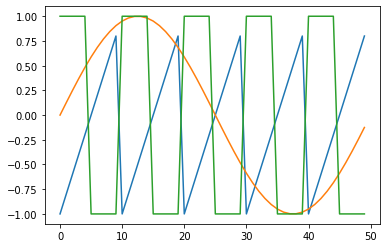

In [8]:
import numpy as np
import matplotlib.pyplot as plt

print(len(np.unique(y[y.columns[0]])))

for s in np.unique(y[y.columns[0]]):
    plt.plot(s)

For the actual experiment, we want to extract *k=10* subgroups of maximum *max_depth=3* conditions each. We also use the quality measure `EuclideanEub` which uses the euclidean distance and euclidean barycenter. 

We then perform the selection using the fixed size description based selector `Desc` here as we do not have many descriptive attributes. Actually we could use any of the available selectors without any noticable performance hit because of the small size of the dataset.

In [9]:
from skmine.dssd import EuclideanEub, DSSDMiner, Desc
dssd = DSSDMiner(k=10, quality=EuclideanEub(), selector=Desc()).fit(D, y)
dssd.discover(return_cover=True)

,quality,pattern,pattern_length,support,cover
0,12.328828,"(cat != ""tri"") & (cat != ""sin"")",2,4,"[4, 5, 6, 7]"
1,10.677078,"(cat == ""squ"")",1,3,"[4, 5, 7]"
2,10.677078,"(cat != ""tri"") & (num < 7.0)",2,3,"[4, 5, 7]"
3,10.677078,(num < 8.5) & (num > 3.45),2,3,"[5, 6, 7]"
4,10.392305,"(cat == ""tri"")",1,4,"[0, 1, 2, 3]"
5,10.392305,"(cat != ""squ"") & (num < 4.95)",2,4,"[0, 1, 2, 3]"
6,10.246951,"(cat != ""tri"") & (num < 9.5)",2,5,"[4, 5, 6, 7, 10]"
7,9.000000,"(cat != ""squ"") & (num < 1.7)",2,3,"[1, 2, 3]"
8,9.000000,(num < 4.95) & (bin == False),2,3,"[0, 2, 3]"
9,8.717798,"(cat != ""squ"") & (cat != ""sq_"")",2,8,"[0, 1, 2, 3, 8, 9, 10, 11]"


As the result shows, there is very less redundancy with respect to the description of the subgroup but visually we can see that many of the selected subgroups have very similar if not identical covers.
We can definitely try to manually reduce redundancy by elimination some results but, instead we are going to try another selection strategy to eliminate some more redundancy now with respect to the subgroup's cover.


We now perform the selection using the variable size cover based selection strategy `VarCover` that aims to achieve diversity with respect to subgroup's cover. This strategy also has the ability to select fewer subgroups than specified if adding subgroups might result in redundancy.     
We choose here a weight of .7 for VarCover to have a somewhat tolerance for overlap in the selection. A weight of almost zero should enfore no overall at all but that will likely result in too strict selection. 

In [10]:
from skmine.dssd import EuclideanEub, DSSDMiner, VarCover
dssd = DSSDMiner(k=10, quality=EuclideanEub(), selector=VarCover(weight=.7)).fit(D, y)
dssd.discover(return_cover=True)

,quality,pattern,pattern_length,support,cover
0,12.328828,"(cat != ""tri"") & (cat != ""sin"")",2,4,"[4, 5, 6, 7]"
1,10.392305,"(cat == ""tri"")",1,4,"[0, 1, 2, 3]"
2,12.328828,"(cat != ""tri"") & (num < 8.5)",2,4,"[4, 5, 6, 7]"
3,7.211103,"(cat == ""sin"")",1,4,"[8, 9, 10, 11]"


As shown up, the result is now much much more smaller and much more concise actually. Visually we can still identify some redundancy from the first and third subgroup.     
Now let's plot the dataset model and the model of each of the extracted subgroups (we skip the first one ;)).

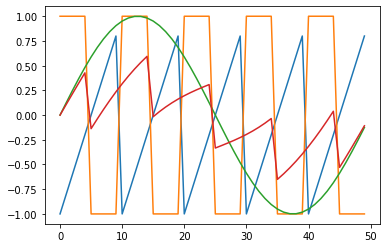

In [12]:
import matplotlib.pyplot as plt

for s in dssd.result[1:]:
    plt.plot(dssd.quality.model_from_subgroup(s))
plt.plot(dssd.quality.dataset_model)
plt.show()

**AND VOILA !!!** We found the exact same unique base time series in the dataset.(**The plot in red shows the general dataset model.**)

This test uses a fictionnal dataset but it can be used to extract subgroups from a dataset on bees with respect to a time series representing the volume of honey the bees produce per day.
Such experiment will find patterns for bees that produce high volumne of honey, and also patterns for low honey producing bees or any other **different** honey producing trend.

Such information can then be shared with an agriculturer who will use it to ajust the caracteristics of low producers to match the high producers in order to increase overall pruduction.

----
##### **Extending the implementation**

Typically, if you wanted to extend the functionnality of this implementation:
* You might want to add a quality measure to either support a new target attribute format or just implement a custom measure.
* Or you might want to customize the refinement operator to support a new target attribute format or just customize it.


Assume you wanted to add support for descriptive time series attributes. You have to implement a refinement operator to handle that attribute type. Here is an example of how you might want to start:

In [13]:
import pandas as pd
from skmine.dssd import  Subgroup, RefinementOperator, RefinementOperatorImpl
from typing import List
class MyRefinementOperator(RefinementOperatorImpl):
    # This method is important as the general dataset could be swapped as any moment and have the operator still perform correctly
    @RefinementOperator.df.setter
    def df(self, df: pd.DataFrame):
        RefinementOperator.df.fset(self, df)
        for col_name, col_type in self.column_types.items():
            if col_type == "nominal":
                if is_time_series(self.df[col_name]): #your own check to make sure the column is a time series
                    self.column_types["ts"] = "time_series"


    def _refine_column(self, cand: Subgroup, col: str, cand_list: List[Subgroup]) -> float:
        if self.column_types[col] == "time_series":
            # your implementation of how to compute subgroup quality here
            # maybe find patterns in the time series, discretize them, whatever you want
            pass
        else:
            super()._refine_column(cand, col, cand_list)

Assume you wanted to you wanted to implement a quality measure for handling numeric target attributes and then later submit it for review and inclusion in this project. Here is how you might want to start your impementation.

In [15]:
import pandas as pd
from skmine.dssd  import QualityMeasure
class MeanTestQuality(QualityMeasure):
    def compute_quality(self, sg: pd.DataFrame) -> float:
        ### your implementation of how to compute subgroup quality here
        return result

    @QualityMeasure.df.setter
    def df(self, df: pd.DataFrame):
        QualityMeasure.df.fset(self, df)
        # update internal state to keep the measure instance in sync with the new target dataframe